# Classifier Comparison

This note is to compare using various classifiers: Naive Bayes, logistic regression, linear/Quadratic Discriminant Analysis, support vector machine and K-nearest-neighbor and random forest to perform classification.

The data is the Titanic data from the Kaggle website. Each observation denotes each passenger's profile, age, coach class, gender and fare. The target is binary, survived or not, y=0/1. We will first visualize the data, to gain insight which feature plays important role. Then we run the classifiers to compare the performance. 

* notation: "MSE" is the mean squared error.

In [227]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 3})
%matplotlib inline

DF = pd.read_csv('train-2.csv')
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [228]:
DF.shape

(891, 12)

In [229]:
DF = DF.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
DF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


### Converting categorical variables to dummy variables

In [230]:
DF = pd.get_dummies(DF)
DF.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22,1,0,7.2500,0,1
1,1,1,38,1,0,71.2833,1,0
2,1,3,26,0,0,7.9250,1,0
3,1,1,35,1,0,53.1000,1,0
4,0,3,35,0,0,8.0500,0,1


### Removing Nan

In [231]:
DF.dropna(inplace=True)

In [232]:
X = DF.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex_female']]
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,3,22,1,0,7.2500,0
1,1,38,1,0,71.2833,1
2,3,26,0,0,7.9250,1
3,1,35,1,0,53.1000,1
4,3,35,0,0,8.0500,0


In [7]:
X.shape

(714, 6)

In [233]:
y = DF.loc[:,'Survived']
print (y.head())
y.shape

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


(714,)

### Preparing training dataset

In [532]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics, cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [533]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female
293,3,24.0,0,0,8.8500,1
3,1,35.0,1,0,53.1000,1
152,3,55.5,0,0,8.0500,0
427,2,19.0,0,0,26.0000,1
838,3,32.0,0,0,56.4958,0


In [534]:
X_train.shape

(428, 6)

In [535]:
y_train.shape

(428,)

### Prepare test and CV datasets

In [536]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [537]:
print (X_test.shape)
print (y_test.shape)
X_test.head()

(143, 6)
(143,)


,Pclass,Age,SibSp,Parch,Fare,Sex_female
287,3,22,0,0,7.8958,0
870,3,26,0,0,7.8958,0
369,1,24,0,0,69.3000,1
308,2,30,1,0,24.0000,0
282,3,16,0,0,9.5000,0


In [538]:
print (X_val.shape)
print (y_val.shape)
X_val.head()

(143, 6)
(143,)


,Pclass,Age,SibSp,Parch,Fare,Sex_female
698,1,49,1,1,110.8833,0
614,3,35,0,0,8.0500,0
890,3,32,0,0,7.7500,0
381,3,1,0,2,15.7417,1
694,1,60,0,0,26.5500,0


### ROC plot function

The following is the prepared function to make ROC plot. The plotting function will be repeatedly used.

In [97]:
from sklearn import metrics, cross_validation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 3})
%matplotlib inline

def ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, title):
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,y_train_prob[:,1])
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    
    fpr_test, tpr_test, _ = metrics.roc_curve(y_test,y_test_prob[:,1])
    roc_auc_test = metrics.auc(fpr_test, tpr_test)

    fpr_val, tpr_val, _ = metrics.roc_curve(y_val,y_val_prob[:,1])
    roc_auc_val = metrics.auc(fpr_val, tpr_val)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, color = 'r')
    plt.plot(fpr_test, tpr_test, color = 'g')
    plt.plot(fpr_val, tpr_val, color = 'b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    green_line = mlines.Line2D([], [], color='green', label='ROC test (area = %0.2f)' % np.mean(roc_auc_test))
    red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
    blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % roc_auc_val)
    plt.legend(handles=[red_line, green_line, blue_line],loc="lower right")

## Data Visualization

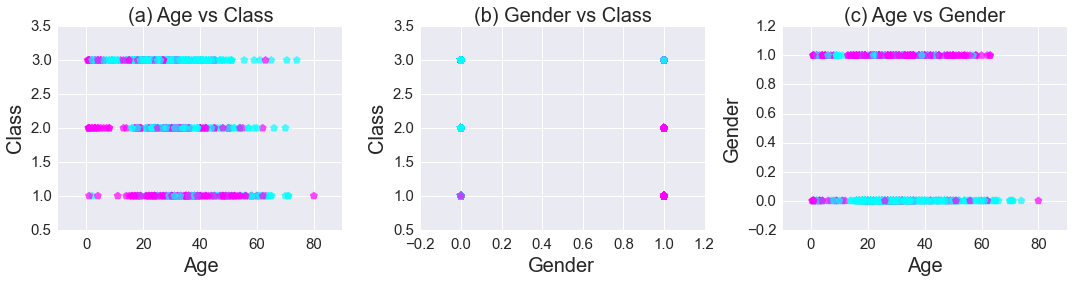

In [539]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (15,4))

x1 = X.loc[:,'Age'].tolist()
x2 = X.loc[:,'Pclass'].tolist()
y_surv  = y.tolist()

ax = plt.subplot(131)
ax.scatter(x1, x2, s=70, c=y, marker=(5, 0), cmap=plt.cm.cool, linewidths=0, alpha=0.7)
ax.set_xlabel('Age', size=20)
ax.set_ylabel('Class', size=20)
ax.set_title('(a) Age vs Class', size=20)

x1 = X.loc[:,'Sex_female'].tolist()
x2 = X.loc[:,'Pclass'].tolist()
ax = plt.subplot(132)
ax.scatter(x1, x2, s=70, c=y, marker=(5, 0), cmap=plt.cm.cool, linewidths=0, alpha=0.7)
ax.set_xlabel('Gender', size=20)
ax.set_ylabel('Class', size=20)
ax.set_title('(b) Gender vs Class', size=20)

x1 = X.loc[:,'Age'].tolist()
x2 = X.loc[:,'Sex_female'].tolist()
ax = plt.subplot(133)
ax.scatter(x1, x2, s=70, c=y, marker=(5, 0), cmap=plt.cm.cool, linewidths=0, alpha=0.7)
ax.set_xlabel('Age', size=20)
ax.set_ylabel('Gender', size=20)
ax.set_title('(c) Age vs Gender', size=20)

fig.tight_layout()
plt.show()

The cyan denote people who didn't survive. "Gender = 0" means "males", whereas "Gender = 1" "females". From these comparison, most survived people are females and are in the first class. The age is roughly an independent factor for adults, except very young children.

## A. Naive Bayes classifier

### A.1 Gaussian Naive Bayes

Here we assumed the features are normal distributed. ".score" means the MSE, defining the correct classification ratio.

In [574]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
#y_pred = gnb.fit(X_train, y_train).predict(X_test)

GaussianNB()

In [575]:
print ('MSE: ', gnb.score(X_test, y_test), gnb.score(X_val, y_val))

MSE:  0.804195804196 0.755244755245


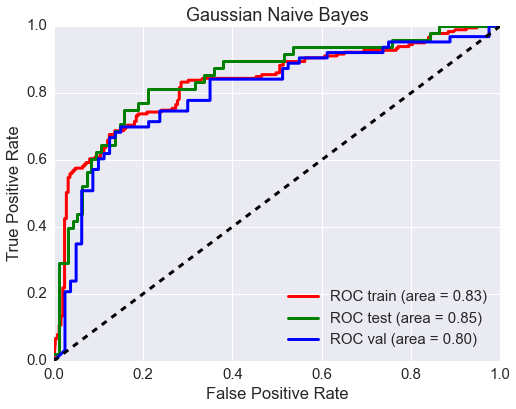

In [573]:
y_train_prob = gnb.predict_proba(X_train)
y_test_prob  = gnb.predict_proba(X_test)
y_val_prob   = gnb.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Gaussian Naive Bayes')

## B. Logistic Regression

In [595]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty='l1', C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [596]:
print ('MSE:', logreg.score(X_test, y_test), logreg.score(X_val, y_val))

MSE: 0.839160839161 0.783216783217


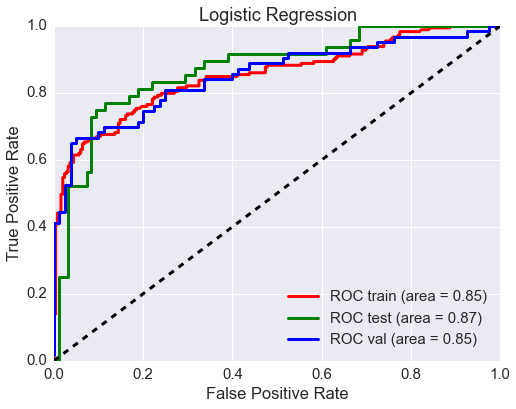

In [597]:
y_train_prob = logreg.predict_proba(X_train)
y_test_prob = logreg.predict_proba(X_test)
y_val_prob = logreg.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Logistic Regression')

In [608]:
importance = logreg.coef_
attribute = X.columns

print (importance)
print (attribute)

[[ -1.13108181e+00  -3.57100199e-02  -4.60546825e-01  -3.02775368e-02
    2.25073990e-03   2.69983956e+00]]
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female'], dtype='object')


We can see the coefficients at gender is most significant. Next is Pclass. But note it is negative since less class number, larger chance to survive. So it has negative correlation.

## C. Linear Discriminant Analysis (LDA)

In [579]:
from sklearn.lda import LDA
lda = LDA()
lda.fit(X_train, y_train)

LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
  store_covariance=False, tol=0.0001)

In [581]:
print ('MSE: ', lda.score(X_test, y_test), lda.score(X_val, y_val))

MSE:  0.825174825175 0.776223776224


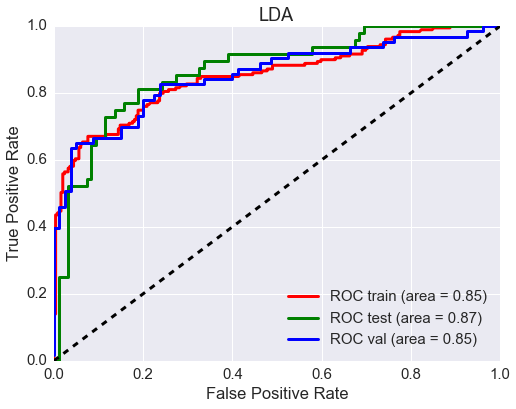

In [550]:
y_train_prob = lda.predict_proba(X_train)
y_test_prob = lda.predict_proba(X_test)
y_val_prob = lda.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'LDA')

## D. Quadratic Discriminant Analysis (QDA)

In [582]:
from sklearn.qda import QDA
qda = QDA()
qda.fit(X_train, y_train)

QDA(priors=None, reg_param=0.0)

In [583]:
print ('MSE:', qda.score(X_test, y_test), qda.score(X_val, y_val))

MSE: 0.804195804196 0.79020979021


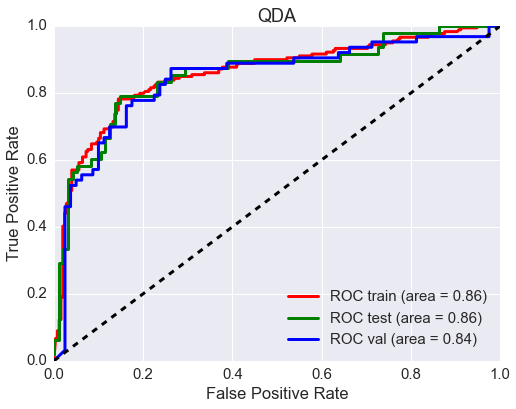

In [584]:
y_train_prob = qda.predict_proba(X_train)
y_test_prob = qda.predict_proba(X_test)
y_val_prob = qda.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'QDA')

## D. Support Vector Machine

Note in the following SVM claaifiers, there are no "predict_proba" methods. So we are unable to plot ROC.

### D.1 SVM with linear kernel

In [585]:
from sklearn import svm
C =1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [586]:
print ('MSE: ', svc.score(X_test, y_test), svc.score(X_val, y_val))

MSE:  0.776223776224 0.783216783217


### D. 2 SVM with rbf kernel

In [587]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.7,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [588]:
print ('MSE: ', rbf_svc.score(X_test, y_test), rbf_svc.score(X_val, y_val))

MSE:  0.657342657343 0.636363636364


### D. 3 Linear Support Vector Classification

In [589]:
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [590]:
print ('MSE: ', lin_svc.score(X_test, y_test), lin_svc.score(X_val, y_val))

MSE:  0.706293706294 0.671328671329


## E. K-nearest neighbor classifier

In [591]:
from sklearn.neighbors import KNeighborsClassifier
best_k = 1
best_acc = 0
for n_neighbors in [1,2,3,5,10,20,30,50]:
    KNN = KNeighborsClassifier(n_neighbors)
    KNN.fit(X_train, y_train)
    acc = KNN.score(X_test, y_test)
    print (n_neighbors, acc)
    if acc > best_acc:
        best_k = n_neighbors
        best_acc = acc

print('best K is:', best_k)

1 0.72027972028
2 0.762237762238
3 0.72027972028
5 0.727272727273
10 0.727272727273
20 0.797202797203
30 0.783216783217
50 0.776223776224
best K is: 20


In [592]:
KNN = KNeighborsClassifier(n_neighbors = best_k)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=20, p=2, weights='uniform')

In [593]:
print('MSE: ', KNN.score(X_test, y_test), KNN.score(X_val, y_val))

MSE:  0.797202797203 0.685314685315


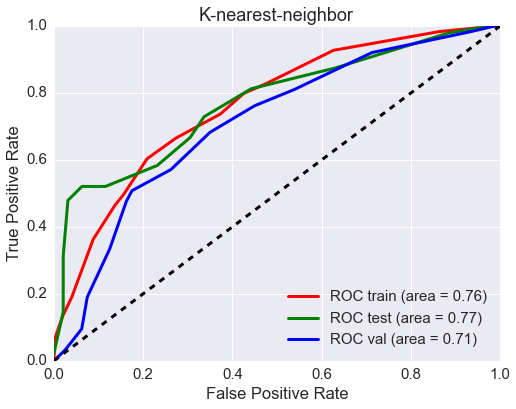

In [560]:
y_train_prob = KNN.predict_proba(X_train)
y_test_prob  = KNN.predict_proba(X_test)
y_val_prob   = KNN.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'K-nearest-neighbor')

## F. Random Forest Model

In [561]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

rf = RandomForestClassifier(n_estimators=6)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [563]:
print ('MSE:', rf.score(X_test, y_test), rf.score(X_val, y_val))

MSE: 0.762237762238 0.755244755245


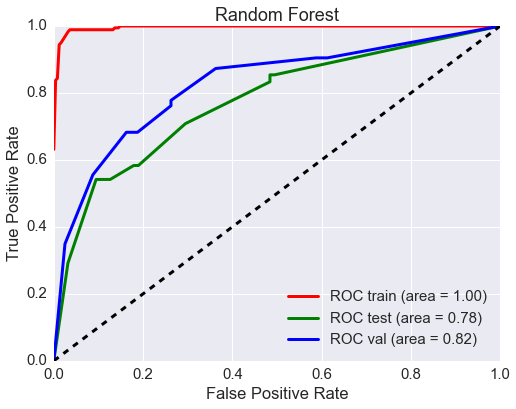

In [564]:
y_train_prob = rf.predict_proba(X_train)
y_test_prob = rf.predict_proba(X_test)
y_val_prob = rf.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Random Forest')

We can see the overfitting isse here since the ROC curve of training set is equal to one.

### F. 2 Random Forest Grid Search

In [565]:
from sklearn import grid_search
rf = RandomForestClassifier()
parameters = {'n_estimators': [2,4,6],'max_depth':[5,10,15],'min_samples_leaf':[10,20]}
model_cv_grid = grid_search.GridSearchCV(rf,parameters,scoring='roc_auc',verbose=2,n_jobs=-1)
model_cv_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  41 jobs       | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  48 out of  54 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    0.4s finished


[CV] max_depth=5, n_estimators=2, min_samples_leaf=10 ................
[CV] max_depth=5, n_estimators=2, min_samples_leaf=10 ................
[CV] max_depth=5, n_estimators=2, min_samples_leaf=10 ................
[CV] max_depth=5, n_estimators=4, min_samples_leaf=10 ................
[CV] ....... max_depth=5, n_estimators=2, min_samples_leaf=10 -   0.0s
[CV] ....... max_depth=5, n_estimators=2, min_samples_leaf=10 -   0.0s
[CV] ....... max_depth=5, n_estimators=2, min_samples_leaf=10 -   0.0s
[CV] ....... max_depth=5, n_estimators=4, min_samples_leaf=10 -   0.0s
[CV] max_depth=5, n_estimators=4, min_samples_leaf=10 ................
[CV] max_depth=5, n_estimators=4, min_samples_leaf=10 ................
[CV] max_depth=5, n_estimators=6, min_samples_leaf=10 ................
[CV] max_depth=5, n_estimators=2, min_samples_leaf=20 ................
[CV] ....... max_depth=5, n_estimators=4, min_samples_leaf=10 -   0.0s
[CV] ....... max_depth=5, n_estimators=4, min_samples_leaf=10 -   0.0s
[CV] .

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'max_depth': [5, 10, 15], 'n_estimators': [2, 4, 6], 'min_samples_leaf': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=2)

In [566]:
best_model = model_cv_grid.best_estimator_
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [567]:
model_tuned = best_model

In [568]:
model_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

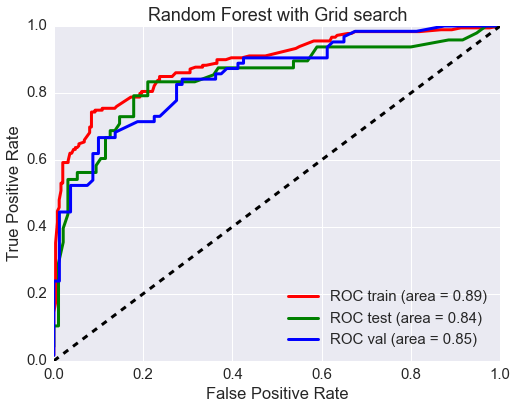

In [569]:
y_train_prob = model_tuned.predict_proba(X_train)
y_test_prob = model_tuned.predict_proba(X_test)
y_val_prob = model_tuned.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_test,y_test_prob, y_val,y_val_prob, 'Random Forest with Grid search')

In [594]:
print ('MSE:', model_tuned.score(X_test, y_test), model_tuned.score(X_val, y_val))

MSE: 0.804195804196 0.762237762238


In [571]:
importance = model_tuned.feature_importances_
attribute = X.columns

v = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
sorted_importance = [importance[i] for i in v]
sorted_attribute = [attribute[i] for i in v]

df_importance = pd.DataFrame({'variable': sorted_attribute, 'importance' : sorted_importance})
df_importance.sort_index().head(5)

,importance,variable
0,0.530204,Sex_female
1,0.189801,Pclass
2,0.177489,Fare
3,0.065283,Age
4,0.026105,SibSp


This results show the most significant factor for passengers survived or not is the gender. The people might still  let ladies to have the priority to board the life-boat. Second is the class level. We can the first class passengers have larger chance to survive, and then the ages. 

## Conclusion

The performances for all classifiers are quite similar. But roughly speaking, random forest, LDA/QDA and logistic regression are a little bit better than other classifiers. The KNN's and SVM performance is not as good as others. In particular, SVM is relatively slow, even in the small dataset. Note that random forest has the overfit issue (ROC area is equal to 1). Therefore, running grid search to find best parameters is suggested.

From both logistic regression and random forest, we can learn that gender is the most significant factor and the class is the second. So female first class passengers have largest chance to survive.